In [1]:
!pip install tensorflow-gpu==2.0.0-rc0

     |████████████████████████████████| 380.5MB 44kB/s 
     |████████████████████████████████| 501kB 49.5MB/s 
     |████████████████████████████████| 4.3MB 47.7MB/s 


In [0]:
 import tensorflow as tf
 from tensorflow import keras
 from tensorflow.keras import Sequential
 from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, ZeroPadding2D, Dropout
 from tensorflow.keras.preprocessing.image import ImageDataGenerator
 from tensorflow.keras import optimizers

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
!git clone https://github.com/Shobhit2526/Malaria-Detection.git

Cloning into 'Malaria-Detection'...
remote: Enumerating objects: 27566, done.
remote: Counting objects: 100% (27566/27566), done.
remote: Compressing objects: 100% (27565/27565), done.
remote: Total 27566 (delta 0), reused 27566 (delta 0), pack-reused 0
Receiving objects: 100% (27566/27566), 331.64 MiB | 50.73 MiB/s, done.
Checking out files: 100% (27561/27561), done.


In [0]:
img_width = 64
img_heigth = 64

In [0]:
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

In [7]:
train_data_generator = datagen.flow_from_directory(directory='/content/Malaria-Detection/Dataset',
                                                   target_size = (64,64),
                                                   class_mode = 'binary',
                                                   batch_size = 16,
                                                   subset = 'training'
                                                   )

Found 22048 images belonging to 2 classes.


In [8]:
validation_data_generator = datagen.flow_from_directory(directory='/content/Malaria-Detection/Dataset',
                                                   target_size = (64,64),
                                                   class_mode = 'binary',
                                                   batch_size = 16,
                                                   subset = 'validation'
                                                   )

Found 5510 images belonging to 2 classes.


In [9]:
train_data_generator.labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [0]:
model = Sequential()

model.add(Conv2D(16,(3,3),input_shape = (img_width,img_heigth,3), activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3), activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [15]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 16)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)             

In [0]:
model.compile(optimizers='adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [18]:
history = model.fit_generator(generator = train_data_generator,
                              steps_per_epoch = len(train_data_generator),
                              epochs = 5,
                              validation_data = validation_data_generator,
                              validation_steps = len(validation_data_generator))

Epoch 1/5
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
1378/1378 [==============================] - 68s 49ms/step - loss: 0.5184 - accuracy: 0.7406 - val_loss: 0.3043 - val_accuracy: 0.9207
Epoch 2/5
1378/1378 [==============================] - 62s 45ms/step - loss: 0.2435 - accuracy: 0.9222 - val_loss: 0.2852 - val_accuracy: 0.9417
Epoch 3/5
1378/1378 [==============================] - 63s 46ms/step - loss: 0.2352 - accuracy: 0.9380 - val_loss: 0.2974 - val_accuracy: 0.9448
Epoch 4/5
1378/1378 [==============================] - 62s 45ms/step - loss: 0.2442 - accuracy: 0.9421 - val_loss: 0.2715 - val_accuracy: 0.9408
Epoch 5/5
1378/1378 [==============================] - 62s 45ms/step - loss: 0.2375 - accuracy: 0.9436 - val_loss: 0.2681 - val_accuracy: 0.9448


In [19]:
history.history

{'accuracy': [0.740566, 0.9221698, 0.93795353, 0.9420809, 0.943623],
 'loss': [0.5183793431302027,
  0.24351074058949104,
  0.2351710903323127,
  0.24419717873069519,
  0.23753018200404927],
 'val_accuracy': [0.92068964, 0.9417423, 0.94482756, 0.9408348, 0.94482756],
 'val_loss': [0.30433499003234116,
  0.2852051605349002,
  0.2973962307840154,
  0.2715472343661215,
  0.2680800716622152]}

In [0]:
def plot_learningCurve(history,epoch):
  #plot training & validation accuracy values
   epoch_range = range(1,epoch+1)
   plt.plot(epoch_range,history.history['accuracy'])
   plt.plot(epoch_range,history.history['val_accuracy'])
   plt.title('Model_Accuracy')
   plt.ylabel('Accuracy')
   plt.xlabel('Epoch')
   plt.legend(['Train','Val'],loc = 'upper left')
   plt.show()
#plot training & validtaion loss values
   plt.plot(epoch_range,history.history['loss'])
   plt.plot(epoch_range,history.history['val_loss'])
   plt.title('Model_loss')
   plt.ylabel('Loss')
   plt.xlabel('Epoch')
   plt.legend(['Train','Val'],loc = 'upper left')
   plt.show()

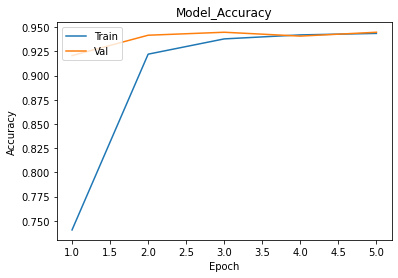

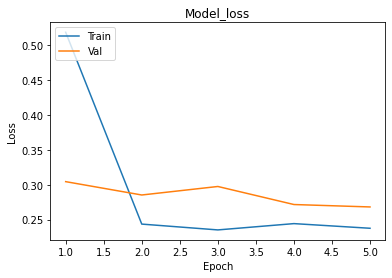

In [22]:
plot_learningCurve(history,5)